## 다중선형회귀분석

- #### CRIM, RM, LSTAT 세개 변수가  PRICE 에 영향을 주는지 확인
    - Boston 주택 가격데이터 이용 

- import statsmodels.api as sm

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import statsmodels.api as sm

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston_df["PRICE"] =pd.DataFrame(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
x_data = boston_df[["CRIM","RM","LSTAT"]]
x_data.head() #특정변수

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [7]:
 #독립변수
price = boston_df[["PRICE"]]

In [9]:
#독립변수의 상수항 고려하도록, 독립변수를 묶은 거 외에 선형회귀분석과 다를 바 없음.
x_data1 = sm.add_constant(x_data,has_constant='add')

In [13]:
multi_model = sm.OLS(price,x_data1)
fitted_multi_model = multi_model.fit() #다중회기모형
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.01e-112
Time:                        14:57:06   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### 단순선형회귀모델의 호귑계수와  비교

In [14]:
price = boston_df[["PRICE"]]
crim = boston_df[["CRIM"]]

crim1 =  sm.add_constant(crim,has_constant='add')
model1 =sm.OLS(price,crim1)
fitted_model1  = model1.fit()
print(fitted_model1.params) #단순

const    24.033106
CRIM     -0.415190
dtype: float64


In [15]:
print(fitted_multi_model.params)  #다중

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


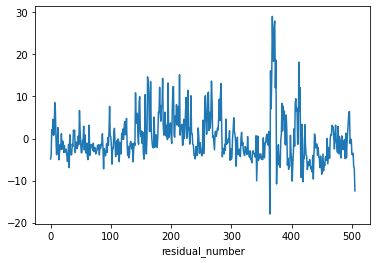

In [17]:
import matplotlib.pyplot as plt
fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [ ]:
#과제 : crim, rm lstat 세개 변수로 다중 선형 회귀 적합한 결과와 각각의 변수를 단순선형회귀 적합한 모델의 회귀계수를 비교

- #### 상관계수/산점도를 통해 다중공선성 확인

In [18]:
x_data.corr() #crim,rm,istat

,CRIM,RM,LSTAT
CRIM,1.000000,-0.219247,0.455621
RM,-0.219247,1.000000,-0.613808
LSTAT,0.455621,-0.613808,1.000000


In [19]:
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


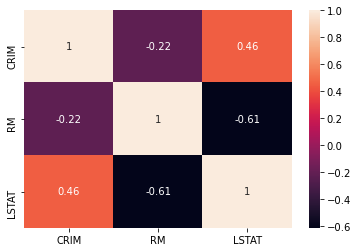

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(x_data.corr(),annot =True)
plt.show()

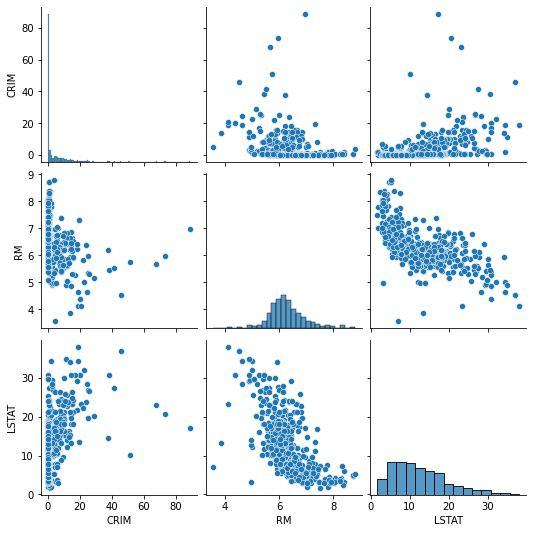

In [22]:
sns.pairplot(x_data)
plt.show()

- #### VIF를 통한 다중공선성 확인

- from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif  =  pd.DataFrame()
vif ["VIF Factor "] = [variance_inflation_factor(x_data.values,i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,1.475257,CRIM
1,3.379490,RM
2,4.167763,LSTAT


In [28]:
x_data2 = x_data.drop('LSTAT',axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values,i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,1.151584,CRIM
1,1.151584,RM


In [34]:
x_data3 = sm.add_constant(x_data2)
model_vif = sm.OLS(price,x_data3)
fitted_model_vif = model_vif.fit()
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     297.6
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           5.22e-86
Time:                        16:15:08   Log-Likelihood:                -1642.7
No. Observations:                 506   AIC:                             3291.
Df Residuals:                     503   BIC:                             3304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.2447      2.588    -11.300      0.000     -34.330     -24.160
CRIM          -0.2649      0.033     -8.011      0.000      -0.330      -0.200
RM             8.3911      0.405     20.726      0.000       7.596       9.186
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
fitted_multi_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.01e-112
Time:                        16:15:26   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### 학습 / 검증데이터 분할

- from sklearn.model_selection import train_test_split

In [36]:
from sklearn.model_selection import train_test_split


x = x_data
y = price
x_train,x_test, y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state = 102)


print(x_train.shape,x_test.shape ,y_train.shape,y_test.shape)

(354, 3) (152, 3) (354, 1) (152, 1)


In [38]:
x_train2 = sm.add_constant(x_train)
fit_1 = sm.OLS(y_train, x_train2)
fit_1 = fit_1.fit()

In [39]:
x_test2 = sm.add_constant(x_test)
fit_1.predict(x_test2)

404     5.439925
302    26.379176
465    18.944288
278    27.196242
295    28.757754
         ...    
8       9.191039
459    19.858532
165    23.326341
461    21.778478
476    19.799286
Length: 152, dtype: float64

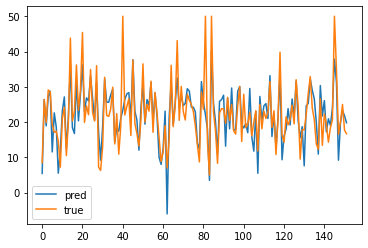

In [40]:
plt.plot(np.array(fit_1.predict(x_test2)),label="pred")
plt.plot(np.array(y_test),label="true")
plt.legend()
plt.show()

In [42]:
x=x_data2
y=price
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=102)
print(x2_train.shape, x2_test.shape, y2_train.shape,y2_test.shape)

(354, 2) (152, 2) (354, 1) (152, 1)


In [44]:
x2_train2 =sm.add_constant(x2_train)

fit_2 = sm.OLS(y2_train,x2_train2)
fit_2 =fit_2.fit()

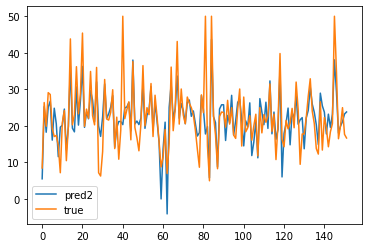

In [45]:
x2_test2 = sm.add_constant(x2_test)
plt.plot(np.array(fit_2.predict(x2_test2)),label="pred2")
plt.plot(np.array(y2_test),label="true")
plt.legend()
plt.show()

- #### MSE를 통한 검증데이터에 대한 성능비교

- from sklearn.metrics import mean_squared_error

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mean_squared_error(y_true=y_test["PRICE"],y_pred=fit_1.predict(x_test2))

28.052043899506305

In [50]:
mean_squared_error(y_true=y2_test["PRICE"],y_pred=fit_2.predict(x2_test2))

34.72978507893944

In [ ]:
#criim,rm,lstat,b,tax,age,zn,nox,indus 변수로 데이터를 분할하여 회귀모형 생성 후 성능 ㅎ ㅘㄱ인
#다중공선성을 확인하여 변수 제거 후 모형의 성능 높이기
